<a href="https://colab.research.google.com/github/linusrandu/MLP-from-Scratch/blob/main/MLP_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import dataset from Kaggle**

In [ ]:
from google.colab import files
files.upload() #https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"linusrandu","key":"b942f23fff91bf02cdf2f2df08f5df3b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-recognition

100% 448M/450M [00:04<00:00, 129MB/s]
100% 450M/450M [00:04<00:00, 114MB/s]


In [ ]:
from zipfile import ZipFile
file_name = 'flowers-recognition.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


**Load, resize images to 320 x 240, and turn into grayscale**

In [ ]:
import cv2
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

dandelion = '/content/flowers/flowers/dandelion'

images = []
labels = []

for i in range(100):
  y = 0
  labels.append(y)
for i in range(100):
  y = 1
  labels.append(y)
for i in range(100):
  y = 2
  labels.append(y)

i = 0
for image in os.listdir(dandelion):
  img_dan = cv2.imread(os.path.join(dandelion,image))
  img_dan = cv2.cvtColor(img_dan, cv2.COLOR_BGR2GRAY)
  img_dan = cv2.resize(img_dan, (320,240))
  images.append(img_dan)
  i += 1
  if i == 100:
    break

rose = '/content/flowers/flowers/rose'

i = 0
for image in os.listdir(rose):
  img_rose = cv2.imread(os.path.join(rose,image))
  img_rose = cv2.cvtColor(img_rose, cv2.COLOR_BGR2GRAY)
  img_rose = cv2.resize(img_rose, (320,240))
  images.append(img_rose)
  i += 1
  if i == 100:
    break

sunflower = '/content/flowers/flowers/sunflower'

i = 0
for image in os.listdir(sunflower):
  img_sf = cv2.imread(os.path.join(sunflower,image))
  img_sf = cv2.cvtColor(img_sf, cv2.COLOR_BGR2GRAY)
  img_sf = cv2.resize(img_sf, (320,240))
  images.append(img_sf)
  i += 1
  if i == 100:
    break

In [ ]:
def load_dataset(urls): #yg dalam bentuk function
  images = []
  for url in urls:
    i = 0
    for image in os.listdir(url):
      img = cv2.imread(os.path.join(url,image))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (320,240))
      images.append(img)
      i += 1
      if i == 100:
        break

  labels = []
  for j in range(len(urls)):
    for i in range(100):
      y = j
      labels.append(y)
  return images, labels

In [ ]:
dandelion = '/content/flowers/flowers/dandelion'
rose = '/content/flowers/flowers/rose'
sunflower = '/content/flowers/flowers/sunflower'

images, labels = load_dataset([dandelion, rose, sunflower])

In [ ]:
np.array(images).shape

(300, 240, 320)

In [ ]:
np.array(labels).shape

(300,)

**Data visualization**

In [ ]:
def visualize_data(data):
  plt.figure(figsize = (30,30))
  for i in range(3):
    img = data[100*i]
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(str(labels[100*i]))

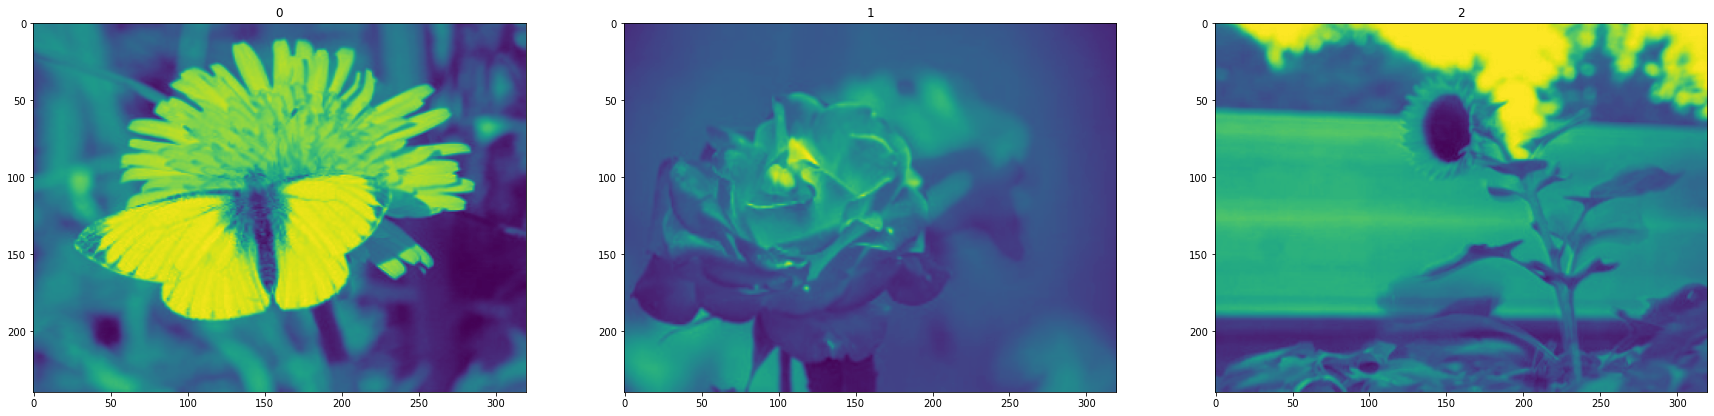

In [ ]:
visualize_data(images)

**One Hot Encoding**

In [ ]:
def OHE(labels, n):
  ohe = np.eye(n)[labels]
  return ohe

In [ ]:
OHE(labels, 3)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

**Sigmoid**

In [ ]:
def sigmoid(x):
   return 1/(1+np.exp(-x))

**Weight initialization and bias**

In [ ]:
import numpy as np

In [ ]:
def initialization(layer):
    nLayer = len(layer)
    bias = [np.random.randn(y,1) for y in layer[1:]]
    w = [np.random.randn(y,x) for x,y in zip(layer[:-1], layer[1:])]
    return [bias, w, nLayer]

**Loss Function**

In [ ]:
def cross_entropy(pred, y):
    return np.sum(np.nan_to_num(-y*np.log(pred)-(1-y)*np.log(1-pred)))

**FeedForward**

In [ ]:
def feedforward(x):
    weight = x
    weights = [x]
    dotProd = []
    for b, w in zip(Theta[0], Theta[1]):
        dots = np.dot(w, weight) + b
        dotProd.append(dots)
        weight = sigmoid(dots)
        weights.append(weight)
        
    return dotProd, weights

**Backpropagation**

In [ ]:
def backpropagation(x,y):
  deltaBias = [np.zeros(b.shape) for b in Theta[0]]
  deltaW = [np.zeros(w.shape) for w in Theta[1]]
    
  dotProd, weight = feedforward(x)
    
  loss = cross_entropy(weight[-1], y)
  delta_cost = weight[-1] - y
    
  delta = delta_cost
    
  deltaBias[-1] = delta
  deltaW[-1]= np.dot(delta, weight[-2].T)
    
  for x in range(2, Theta[2]):
      dots = dotProd[-x]
      deltaA = delta_sigmoid(dots)
      delta = np.dot(Theta[1][-x + 1].T, delta) * deltaA
      deltaBias[-x] = delta
      deltaW[-x] = np.dot(delta, weight[-x - 1].T)
        
  return(loss, deltaBias, deltaW)

**Prediction**

In [ ]:
def prediction(X):
  prediction = np.array([])
  labels = ["sunflower","dandelion","rose"]
  for x in X:
      dots, weight = feedforward(x)
      prediksi = np.append(prediksi, np.argmax(weight[-1]))
  prediction = np.array([labels[int(p)] for p in prediksi])
  return prediction

**Accuracy**

In [ ]:
def accuracy(X, y):
  tmp = 0
  for x, y in zip(X, y):
      dots, weight = feedforward(x)
        
      if np.argmax(weight[-1]) == np.argmax(y):
          tmp += 1
  acc = (float(tmp) / X.shape[0]) * 100
  return acc

**Pixel Normalization**

In [ ]:
def pixel_normalization(data):
  return data/255

In [ ]:
image = np.array(images)
image = pixel_normalization(image)
image.shape

(300, 240, 320)

**Split Data Training & Testing**

In [ ]:
from sklearn.model_selection import train_test_split as split
def train_test_split (X, Y, trainSize):
    X_train, X_test, Y_train, Y_test = split(X, Y, train_size = trainSize)
    return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(image, labels, 0.8)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 0.8)

**Reshaping Data**

In [ ]:
def reshape_x(data, n):
    data = data.reshape(-1, n, 1)
    return data

In [ ]:
neurons = image.shape[1] * image.shape[2]
neurons

76800

In [ ]:
X_train = reshape_x(X_train, neurons)
X_test = reshape_x(X_test, neurons)
X_val = reshape_x(X_val, neurons)

**Call One Hot Encoding**

In [ ]:
Y_train = np.array(Y_train)
y_train_ohe = OHE(Y_train, 3)

In [ ]:
y_train_ohe = y_train_ohe.reshape(-1, 3, 1)

In [ ]:
alpha = 0.1
epoch = 50
Theta = initialization([X_train[0].size, 128, y_train_ohe[0].size])
len(Theta)

3

In [ ]:
Y_val = np.array(Y_val)
y_val_ohe = OHE(Y_val, 3)
y_val_ohe = y_val_ohe.reshape(-1, 3, 1)

In [ ]:
X_train.shape

(192, 76800, 1)

In [ ]:
y_train_ohe.shape

(192, 3, 1)

**Define Batch**

In [ ]:
def getBatch(X, y, size):
    for idx in range(0, X.shape[0], size):
        batch = zip(X[idx:idx+size], y[idx:idx+size])
        yield batch

In [ ]:
def delta_sigmoid(x):
    return sigmoid(x) * (1- sigmoid(x))

In [ ]:
Y_val = np.array(Y_val)
y_val_ohe = OHE(Y_val, 3)
y_val_ohe = y_val_ohe.reshape(-1, 3, 1)

In [ ]:
historyLoss = []
historyAcc = []
for j in range(epoch):
    batch = getBatch(X_train, y_train_ohe, 32)
    for i in range(int(X_train.shape[0]/32)):
        iter = next(batch)
        deltaBias = [np.zeros(b.shape) for b in Theta[0]]
        deltaW = [np.zeros(w.shape) for w in Theta[1]]
        for batch_X, batch_Y in iter:
            loss, delta_deltaBias, delta_deltaW = backpropagation(batch_X, batch_Y)
            deltaBias = [db + ddb for db, ddb in zip(deltaBias, delta_deltaBias)]
            deltaW = [dw + ddw for dw, ddw in zip(deltaW, delta_deltaBias)]
    Theta[1] = [w - (alpha/32)*delw for w, delw in zip(Theta[1], deltaW)]
    Theta[0] = [b - (alpha/32)*delb for b, delb in zip(Theta[0], deltaBias)]
    historyLoss.append(loss)
    acc = accuracy(X_val, y_val_ohe)
    historyAcc.append(acc)
    print("Epoch : %d\tLoss: %f\tAkurasi: %f\n"%(j, loss, acc))

Epoch : 0	Loss: 14.802008	Akurasi: 31.250000

Epoch : 1	Loss: 3.961206	Akurasi: 39.583333

Epoch : 2	Loss: 5.158567	Akurasi: 29.166667

Epoch : 3	Loss: 3.091436	Akurasi: 31.250000

Epoch : 4	Loss: 3.904916	Akurasi: 25.000000

Epoch : 5	Loss: 4.294914	Akurasi: 33.333333

Epoch : 6	Loss: 3.344666	Akurasi: 41.666667

Epoch : 7	Loss: 3.969947	Akurasi: 33.333333

Epoch : 8	Loss: 2.541078	Akurasi: 35.416667

Epoch : 9	Loss: 2.722505	Akurasi: 33.333333

Epoch : 10	Loss: 2.898970	Akurasi: 35.416667

Epoch : 11	Loss: 2.713224	Akurasi: 37.500000

Epoch : 12	Loss: 2.297691	Akurasi: 33.333333

Epoch : 13	Loss: 2.637849	Akurasi: 33.333333

Epoch : 14	Loss: 2.623914	Akurasi: 35.416667

Epoch : 15	Loss: 2.665629	Akurasi: 33.333333

Epoch : 16	Loss: 2.759103	Akurasi: 33.333333

Epoch : 17	Loss: 2.677665	Akurasi: 33.333333

Epoch : 18	Loss: 2.723492	Akurasi: 31.250000

Epoch : 19	Loss: 2.732716	Akurasi: 35.416667

Epoch : 20	Loss: 2.688723	Akurasi: 35.416667

Epoch : 21	Loss: 2.295160	Akurasi: 33.33333

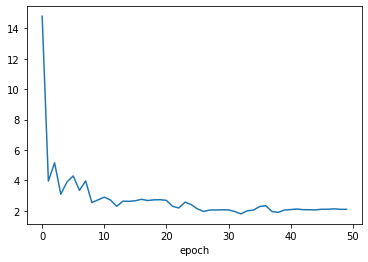

In [ ]:
plt.plot(range(len(historyLoss)),historyLoss)
plt.xlabel('epoch')
plt.show()